Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 3 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [1]:
import pandas as pd
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
! ls

README.md   housing.csv hw1.ipynb


Данные по домохозяйствам в Калифорнии

In [3]:
data = pd.read_csv('housing.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


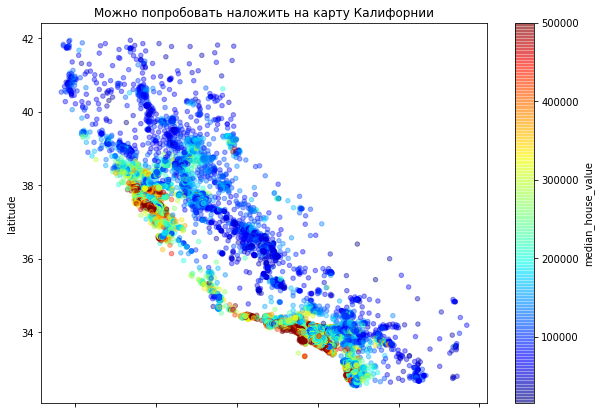

In [12]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, c="median_house_value", colorbar=True, \
          title='Можно попробовать наложить на карту Калифорнии', cmap=plt.get_cmap("jet"), figsize=(10,7))

Смотрим распределения в поисках аномалий и находим их

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112f10048>,
      dtype=object)

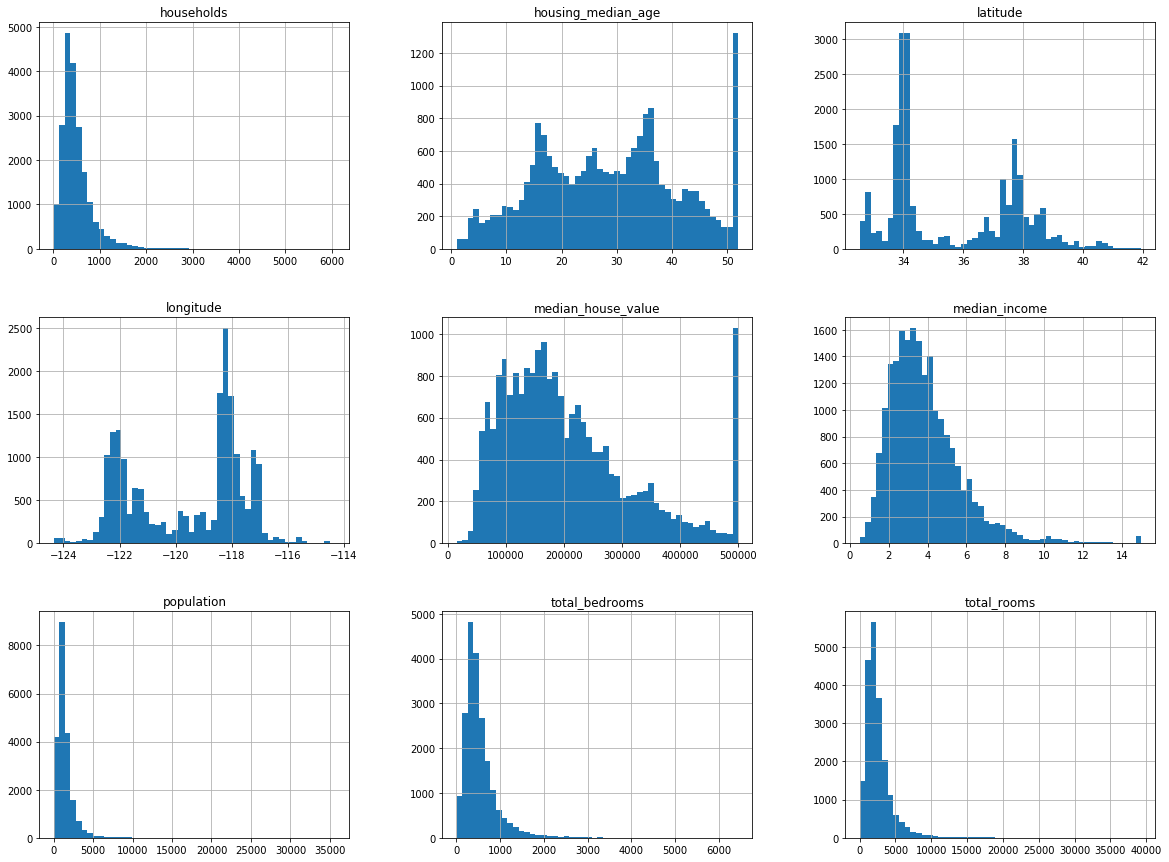

In [7]:
data.hist(bins=50, figsize=(20,15))

Ищем корреляцию

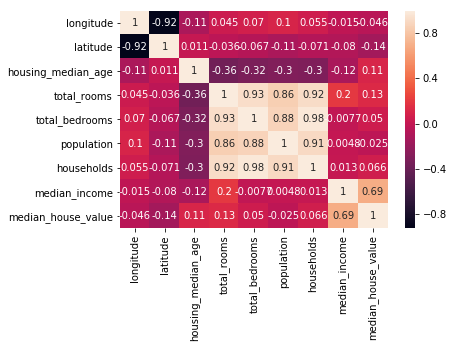

In [15]:
corr = data.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Смотрим корреляции детально

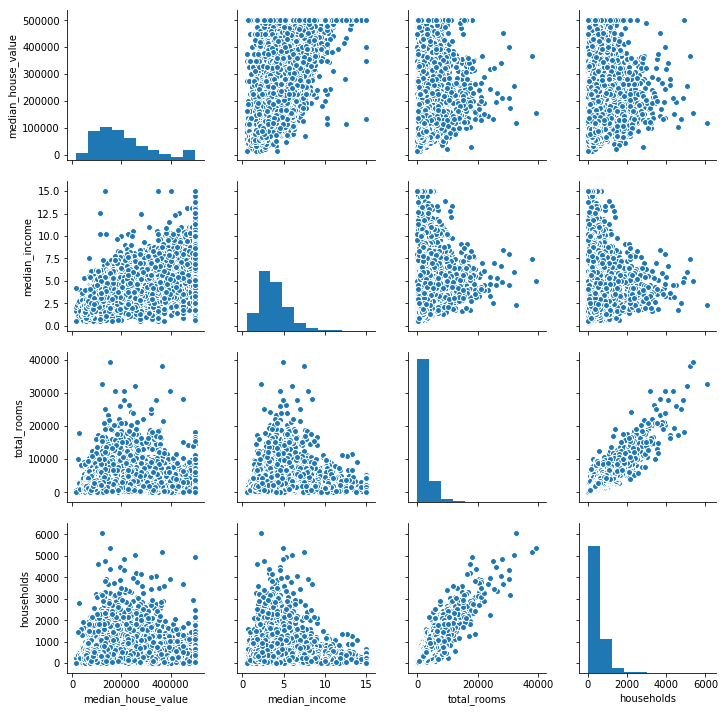

In [21]:
sns.pairplot(
    data[['median_house_value', 'median_income', 'total_rooms', 'households', '']]);

In [22]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [23]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [25]:
gram = []

for prox in data.ocean_proximity.unique():
    gram.append(
        go.Box(y=data[data.ocean_proximity==prox].median_house_value, 
               name=prox)
    )
iplot(gram, show_link = False)